## Problem Statement

•	Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 

•	These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

•	To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 


In [1]:
#importing libraries#
%matplotlib inline 
import numpy as np
import pandas as pd
from matplotlib  import pyplot as plt
from matplotlib  import pyplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
sns.set(color_codes=True)
from sklearn import svm

In [2]:
#importing training data into pandas dataframes 
training_data = pd.read_csv("Loan_Train.csv")
training_data.head()
des = training_data.describe()
testing_data = pd.read_csv("Loan_Test.csv")

# Missing value analysis

In [3]:
#drop rows with NA or imputing???. Do you impute loan_amount with mean value?? 
#Imputing categorical variable with unique category(followed by columns encoding) is possible. But what about loan_amt,loan term columns?
#Final thoughts -->> 
#your testing data too contains blank values .In order to predict, you cannot change testing data.
#Another important reason is I want to try and test :D 
#Final categorical variables : NA replaced by U , Numerical columns : Replaced by mean
#col_mask=training_data.isna().any(axis=0) 
#print(col_mask)

col_mask=testing_data.isnull().any(axis=0) 
print(col_mask)

naTrainSum = training_data.isnull().sum()  #Total NA = 149
naTestSum = testing_data.isna().sum()
print(naTestSum)
#training_data.columns
print(testing_data.columns)
values = {'Gender': 'U', 'Married': 'U', 'Dependents': 'U', 'Self_Employed': 'U', 'Credit_History' : 2 ,'LoanAmount' : np.mean(training_data.iloc[:,8]) , 'Loan_Amount_Term' :   np.mean(training_data.iloc[:,9]) }
training_data = training_data.fillna(value=values)
testing_data = testing_data.fillna(value=values)

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


# Encoding coloumns

In [4]:
#test data
from sklearn.preprocessing import OneHotEncoder
encoder =  OneHotEncoder()
transformedCol1 = encoder.fit_transform(testing_data.iloc[:,1].values.reshape(-1,1)).toarray()
transformedCol2 = encoder.fit_transform(testing_data.iloc[:,2].values.reshape(-1,1)).toarray()
transformedCol3 = encoder.fit_transform(testing_data.iloc[:,3].values.reshape(-1,1)).toarray()
transformedCol4 = encoder.fit_transform(testing_data.iloc[:,4].values.reshape(-1,1)).toarray()
transformedCol5 = encoder.fit_transform(testing_data.iloc[:,5].values.reshape(-1,1)).toarray()
transformedCol10 = encoder.fit_transform(testing_data.iloc[:,10].values.reshape(-1,1)).toarray()
transformedCol11 = encoder.fit_transform(testing_data.iloc[:,11].values.reshape(-1,1)).toarray()
transformed_test_data = np.c_[transformedCol1[:,[0,1]],transformedCol2[:,[0,1]],transformedCol3[:,[0,1,2,3]],transformedCol4[:,0],transformedCol5[:,[0,2]],transformedCol10[:,[0,1]],transformedCol11[:,[0,1,2]],testing_data.iloc[:,[6,7,8,9]]]

#same opertaion on train data

transformedCol1 = encoder.fit_transform(training_data.iloc[:,1].values.reshape(-1,1)).toarray()
transformedCol2 = encoder.fit_transform(training_data.iloc[:,2].values.reshape(-1,1)).toarray()
transformedCol3 = encoder.fit_transform(training_data.iloc[:,3].values.reshape(-1,1)).toarray()
transformedCol4 = encoder.fit_transform(training_data.iloc[:,4].values.reshape(-1,1)).toarray()
transformedCol5 = encoder.fit_transform(training_data.iloc[:,5].values.reshape(-1,1)).toarray()
transformedCol10 = encoder.fit_transform(training_data.iloc[:,10].values.reshape(-1,1)).toarray()
transformedCol11 = encoder.fit_transform(training_data.iloc[:,11].values.reshape(-1,1)).toarray()
transformed_training_data = np.c_[transformedCol1[:,[0,1]],transformedCol2[:,[0,1]],transformedCol3[:,[0,1,2,3]],transformedCol4[:,0],transformedCol5[:,[0,2]],transformedCol10[:,[0,1]],transformedCol11[:,[0,1,2]],training_data.iloc[:,[6,7,8,9]]]




In [5]:
#Spliting data into features and label

x_train = transformed_training_data #shape(614,20)
x_test = transformed_test_data
#Check nan for each column
#checkNATrain = np.isnan(x_train)
#print(checkNATrain)
#checkNATest = np.isnan(x_test)
#print(checkNATest)
#Convert lable values into numbers
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(training_data.iloc[:,12].values)

# Data analysis

/Users/abhaymone/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


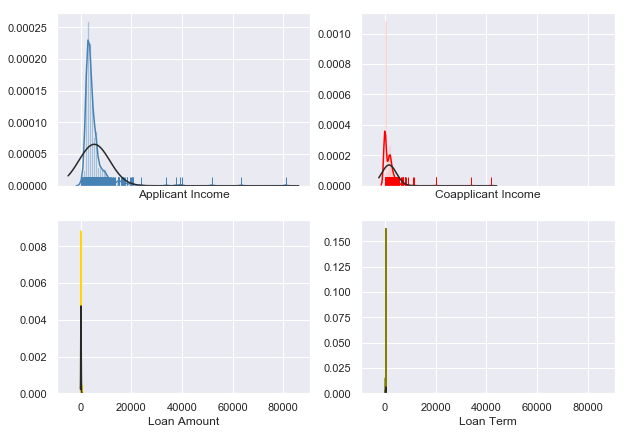

In [6]:
fig, axes = pyplot.subplots(2, 2, figsize=(10, 7), sharex=True)
sns.distplot(x_train[:,16],color='steelblue',bins=100,kde = True, rug= True , fit = norm , axlabel = "Applicant Income" ,ax= axes[0,0])
sns.distplot(x_train[:,17],color='red',bins=100,kde = True, rug= True , fit = norm, axlabel = "Coapplicant Income",ax= axes[0,1])
sns.distplot(x_train[:,18],color='gold',bins=20,kde = True, rug= True , fit = norm , axlabel = "Loan Amount",ax= axes[1,0])
sns.distplot(x_train[:,19],color='olive',bins=10,kde = True, rug= True , fit = norm, axlabel = "Loan Term",ax= axes[1,1])
pyplot.show()

We can see that mentioned columns are not normally distributed. We will apply method for scaling and normally distributed.

Outliers :
Applicant Income, Coapplicant Income,Loan_amount , Loan_Term : There are outliers . But resonable. We cant remove outliers.

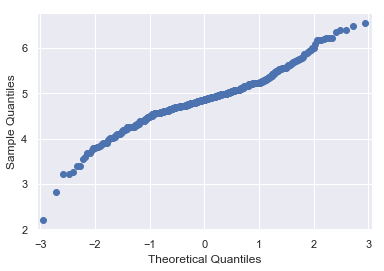

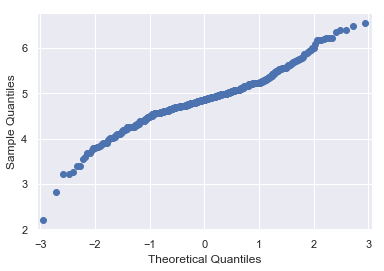

In [7]:
#Q - Q Plotting
qqplot(np.log(x_train[:,18]))

# log transformations

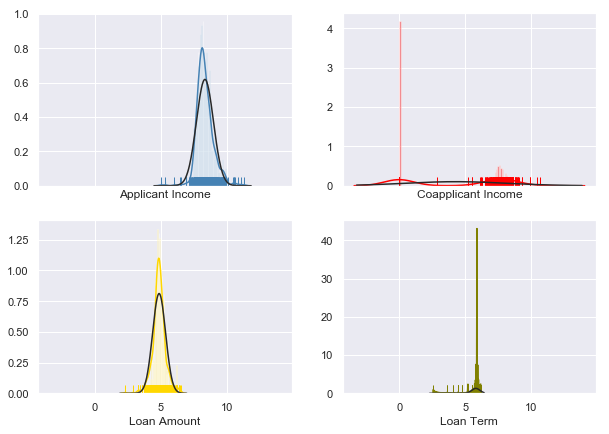

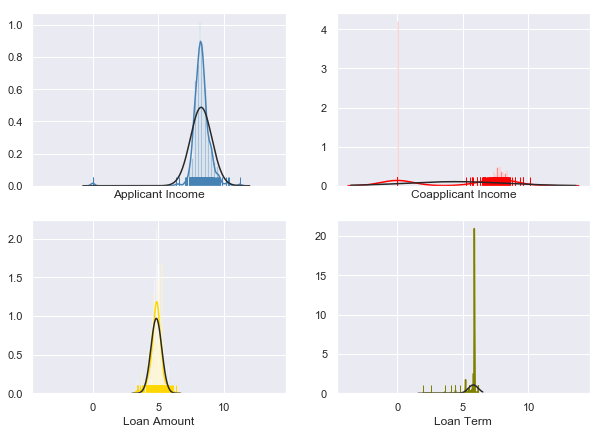

In [8]:
#log1p will be benificial with column having zero value.
scaled_x_train = np.c_[x_train[:,0:16],np.log1p(x_train[:,16]),np.log1p(x_train[:,17]),np.log1p(x_train[:,18]),np.log1p(x_train[:,19])]
scaled_x_test = np.c_[x_test[:,0:16],np.log1p(x_test[:,16]),np.log1p(x_test[:,17]),np.log1p(x_test[:,18]),np.log1p(x_test[:,19])]


#Distribution after scaling -- > train data
fig, axes = pyplot.subplots(2, 2, figsize=(10, 7), sharex=True)
sns.distplot(scaled_x_train[:,16],color='steelblue',bins=100,kde = True, rug= True , fit = norm , axlabel = "Applicant Income" ,ax= axes[0,0])
sns.distplot(scaled_x_train[:,17],color='red',bins=100,kde = True, rug= True , fit = norm, axlabel = "Coapplicant Income",ax= axes[0,1])
sns.distplot(scaled_x_train[:,18],color='gold',bins=100,kde = True, rug= True , fit = norm , axlabel = "Loan Amount",ax= axes[1,0])
sns.distplot(scaled_x_train[:,19],color='olive',bins=100,kde = True, rug= True , fit = norm, axlabel = "Loan Term",ax= axes[1,1])
pyplot.show()

#Distribution after scaling --> test data
fig, axes = pyplot.subplots(2, 2, figsize=(10, 7), sharex=True)
sns.distplot(scaled_x_test[:,16],color='steelblue',bins=100,kde = True, rug= True , fit = norm , axlabel = "Applicant Income" ,ax= axes[0,0])
sns.distplot(scaled_x_test[:,17],color='red',bins=100,kde = True, rug= True , fit = norm, axlabel = "Coapplicant Income",ax= axes[0,1])
sns.distplot(scaled_x_test[:,18],color='gold',bins=100,kde = True, rug= True , fit = norm , axlabel = "Loan Amount",ax= axes[1,0])
sns.distplot(scaled_x_test[:,19],color='olive',bins=100,kde = True, rug= True , fit = norm, axlabel = "Loan Term",ax= axes[1,1])
pyplot.show()

#make sure distributions of training and testing should be loosely simillar.

# Feature Engineering

In [9]:
#select k best features 
from sklearn.feature_selection import SelectKBest,chi2
featureSelection = SelectKBest(k=5)
X_train_new = featureSelection.fit_transform(scaled_x_train,y_train)
#X_train_new.get_support()
#X_train_new.scores_.tolist() #Scores on features selection
#X_train_new.pvalues_.tolist()   #Pvalues on features selection 
X_train_new.shape

(614, 5)

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 5)
rfe = rfe.fit(scaled_x_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False  True False False False False False  True
  True False  True False False False False False]
[ 6  7  1  3 16  1  4 14  2 13 12  1  1  5  1 10  9 11  8 15]


/Users/abhaymone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhaymone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhaymone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhaymone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abhaymone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

# Model Evaluation : Logistic Regression

In [40]:
from sklearn.model_selection import train_test_split
x_train_fe, x_test_fe, y_train_fe , y_test_fe = train_test_split(X_train_new, y_train , random_state = 0 , test_size =0.2)

In [41]:
x_test_fe.shape

(123, 5)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm
import sklearn.metrics as mt

model = LogisticRegression(solver="sag", random_state= 0 ,  C = 100)
y_pred = model.fit(x_train_fe,y_train_fe ).predict(x_test_fe)

In [43]:
confusion_matrix=cm(y_test_fe,y_pred)
print("Confusion Matrix :\n",  cm(y_test_fe,y_pred))

Confusion Matrix :
 [[14 19]
 [ 2 88]]


In [44]:
print("Accuracy score : ", mt.accuracy_score(y_true=y_test_fe, y_pred= y_pred))

Accuracy score :  0.8292682926829268


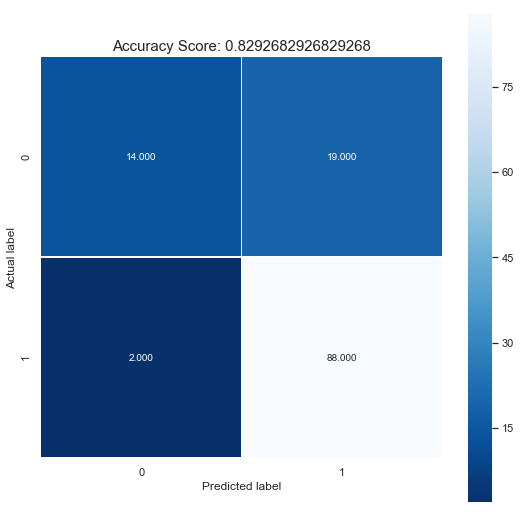

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(mt.accuracy_score(y_true=y_test_fe, y_pred= y_pred))
plt.title(all_sample_title, size = 15);

In [46]:
#percentage of ones in class label  (class label is binary)
y_test_fe.mean()

0.7317073170731707

In [47]:
#percentage of zeros
#1 - y_test_fe.mean()  

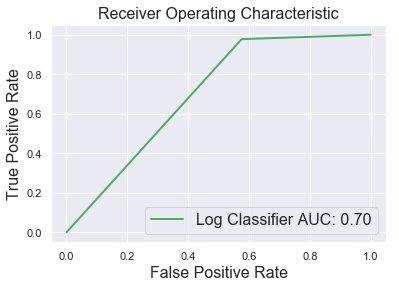

In [48]:
#Roc Curve#
from sklearn.metrics import roc_curve,auc
false_postives , true_positives , thrsh  =  roc_curve(y_test_fe,y_pred)
roc_curve = auc(false_postives, true_positives)

label = 'Log Classifier AUC:' + ' {0:.2f}'.format(roc_curve)
plt.plot(false_postives, true_positives, c = 'g', label = label, linewidth = 2)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


Precision : When positive value or 1 is predicted, how often the prediction is correct??

In [49]:
print("Precision:",mt.precision_score(y_pred=y_pred,y_true=y_test_fe))

Precision: 0.822429906542056


Recall,Sensitivity :  When actual value is positive value or 1, how often the prediction is correct??

In [50]:
print("recall/sensitivity:",mt.recall_score(y_pred=y_pred,y_true=y_test_fe))

recall/sensitivity: 0.9777777777777777


Specificity : When actual value is negative value or 0, how often the prediction is correct?

In [51]:
print("specificity:",confusion_matrix[0, 0] / ( confusion_matrix[0, 0] + confusion_matrix[0, 1]))

specificity: 0.42424242424242425


# Above model is highly sensitive and less specific
There is a trade-off between sensitivity and specificity. If you want to increase the specificity, you should increase the threshold of your decision function but note that it comes at a price and the price is reducing the sensitivity.
There is decision you have to make. If actual value is 0 and predicted is 1 then its fine we are going through process of granting a loan so we can revise the information but if actual value is 1 and predicted value is 0 then thats dangereous. 
Hence we want our model to be high sensitive and less specific (But I would say little more balanced.)

In [52]:
predcted_prob = model.predict_proba(x_test_fe)

In [53]:
predcted_prob

array([[0.18175914, 0.81824086],
       [0.18175914, 0.81824086],
       [0.19934275, 0.80065725],
       [0.19934275, 0.80065725],
       [0.13028008, 0.86971992],
       [0.94868802, 0.05131198],
       [0.26044141, 0.73955859],
       [0.18175914, 0.81824086],
       [0.96480989, 0.03519011],
       [0.13028008, 0.86971992],
       [0.18175914, 0.81824086],
       [0.13028008, 0.86971992],
       [0.18175914, 0.81824086],
       [0.13028008, 0.86971992],
       [0.13028008, 0.86971992],
       [0.19934275, 0.80065725],
       [0.23431249, 0.76568751],
       [0.18175914, 0.81824086],
       [0.33714546, 0.66285454],
       [0.9289337 , 0.0710663 ],
       [0.9289337 , 0.0710663 ],
       [0.13028008, 0.86971992],
       [0.26044141, 0.73955859],
       [0.26044141, 0.73955859],
       [0.32666237, 0.67333763],
       [0.13028008, 0.86971992],
       [0.18175914, 0.81824086],
       [0.13028008, 0.86971992],
       [0.88718926, 0.11281074],
       [0.92102509, 0.07897491],
       [0.

In [54]:
#predicted probabilities for class 1
test_prob_class1 = predcted_prob[:,1]

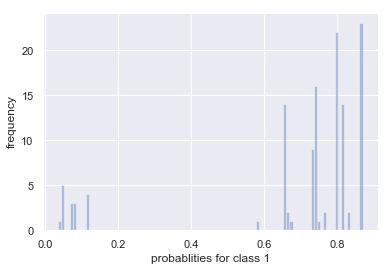

In [55]:
sns.distplot(test_prob_class1,bins =100, hist = True, rug = False , kde = False)
pyplot.xlabel("probablities for class 1")
pyplot.ylabel("frequency")
pyplot.show()

In [56]:
#y_pred_prob = model.predict_proba(x_test_fe)[:,1]
#y_pred_prob

In [57]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize(test_prob_class1.reshape(-1,1), 0.60)

In [58]:
print(confusion_matrix)

[[14 19]
 [ 2 88]]


In [59]:
print("pred class:",y_test_fe )
print("newly pred class:",y_pred_class.tolist())


pred class: [1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 1]
newly pred class: [[1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0

In [60]:
cm_updated = cm(y_test_fe,y_pred_class)
print(cm(y_test_fe,y_pred_class))

[[15 18]
 [ 2 88]]


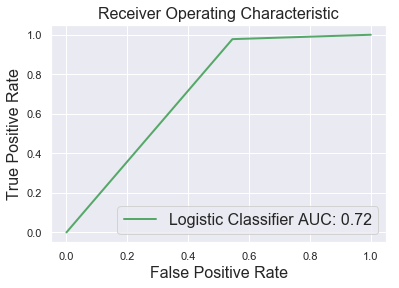

In [61]:
#Roc Curve#
from sklearn.metrics import roc_curve,auc
false_postives , true_positives , thrsh  =  roc_curve(y_test_fe,y_pred_class)
roc_curve = auc(false_postives, true_positives)

label = 'Logistic Classifier AUC:' + ' {0:.2f}'.format(roc_curve)
plt.plot(false_postives, true_positives, c = 'g', label = label, linewidth = 2)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

In [62]:
print("specificity:",cm_updated[0, 0] / ( cm_updated[0, 0] + cm_updated[0, 1]))

specificity: 0.45454545454545453


In [63]:
print("Recall/Sensitivity:",mt.recall_score(y_pred=y_pred_class , y_true= y_test_fe))

Recall/Sensitivity: 0.9777777777777777


In [64]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test_fe, y_pred_class, target_names=target_names))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

   micro avg       0.84      0.84      0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

